<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/ban_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [9]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import csv

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
#df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding = 'cp949')
df = pd.read_csv('/content/drive/MyDrive/python/ban_2021.csv', encoding = 'cp949')
# 첫 5줄을 봅니다. 
df.head(4)

,수시정시,학번,이름,지역,대학,지원\n시기,전형명,계열,모집단위,1\n단계,...,등급.3,원점수.4,표준점수.4,백분위.4,등급.4,과목명.2,원점수.5,표준점수.5,백분위.5,등급.5
0,수시,30101,NaN,서울,성신여자대학교,수시,실기/실적(일반학생),예체능,산업디자인과,NaN,...,4.0,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,수시,30102,NaN,서울,건국대학교,수시,논술(KU논술우수자),인문,미디어커뮤니케이션학과,NaN,...,4.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,수시,30102,NaN,서울,경희대학교,수시,논술(논술우수자전형),인문,국어국문학과,NaN,...,4.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,수시,30102,NaN,서울,서강대학교,수시,논술(일반),인문,지식융합미디어학부,NaN,...,4.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


***2023학년도 B고 합격자수***
서울대학교 합격자수 - 수시: 7명, 정시: 0명
연세대학교 합격자수 - 수시: 4명, 정시: 0명
고려대학교 합격자수 - 수시: 9명, 정시: 0명
서강대학교 합격자수 - 수시: 4명, 정시: 0명
성균관대학교 합격자수 - 수시: 2명, 정시: 0명
중앙대학교 합격자수 - 수시: 2명, 정시: 0명
건국대학교 합격자수 - 수시: 1명, 정시: 0명
동국대학교 합격자수 - 수시: 2명, 정시: 0명


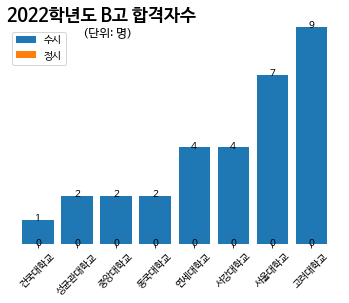

In [13]:
#RPA로 합불자료에서 그래프 자동 완성

import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대학교', '연세대학교', '고려대학교', '서강대학교', '성균관대학교', '한양대학교', '중앙대학교', '경희대학교', '한국외대학교', '서울시립대학교', '이화여대학교', '건국대학교', '동국대학교', '홍익대학교']

# assuming that you have a DataFrame called "df" containing admission information for each student
# and the relevant columns are "수시정시", "대학", and "최종"
df = pd.read_csv("/content/drive/MyDrive/python/ban_2021.csv", encoding = 'cp949')  # replace with your own file name

print("\n***2023학년도 B고 합격자수***")

uni_new = []
num_su = []
num_je = []

for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['수시정시', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['수시정시'] == '수시'])
    num_je_u = len(df_u[df_u['수시정시'] == '정시'])
    
    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")

if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph
   
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')
    
    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        ax.text(i, su+0.05, su, ha='center', va='center')
        ax.text(i, je+0.02, je, ha='center', va='center')
        #ax.text(i, su/2, su, ha='center', va='center')  예비코드: 수시와 정시합격자가 누적될때 적절한 수시합격자수 위치 
        #ax.text(i, su + je/2, je, ha='center', va='center') 예비코드: 수시와 정시합격자가 누적될때 적절한 정시합격자수 위치 


    ax.legend()
    # 그래프 제목
    ax.set_title('2022학년도 B고 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.30, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)
   
    
    plt.xticks(rotation=45)
    plt.box(False) #테두리 박스 제거
    plt.yticks([]) #y축 제거
    plt.show()
else:
    print("조건에 맞는 대학이 없습니다.")


In [17]:
df.columns

Index(['수시정시', '학번', '이름', '지역', '대학', '지원\n시기', '전형명', '계열', '모집단위', '1\n단계',
       '최종', '예비', '등록', '비고', '전형\n종류', '전형\n일자', '1단계\n발표일', '최종\n발표일',
       '최저학력기준', '모집\n인원', '전형\n분류', '전형방법', '전과목', '국수영사과', '국수영사', '국수영과',
       '국수영', '국어', '수학', '영어', '사회', '과학', '비교과', '국어_원점수', '국어_표준점수',
       '국어_백분위', '국어_등급', '수학\n영역', '원점수', '표준점수', '백분위', '등급', '원점수.1',
       '표준점수.1', '백분위.1', '등급.1', '탐구\n영역', '과목명', '원점수.2', '표준점수.2', '백분위.2',
       '등급.2', '과목명.1', '원점수.3', '표준점수.3', '백분위.3', '등급.3', '원점수.4', '표준점수.4',
       '백분위.4', '등급.4', '과목명.2', '원점수.5', '표준점수.5', '백분위.5', '등급.5'],
      dtype='object')

In [18]:
# 서울 주요대학 수시합격자 명단 출력
#uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']
uni = ['서울대학교', '연세대학교', '고려대학교', '서강대학교', '성균관대학교', '한양대학교', '중앙대학교', '경희대학교', '한국외대학교', '서울시립대학교', '이화여대학교', '건국대학교', '동국대학교', '홍익대학교']

print("***2023학년도 서울 주요대학 수시합격자 명단***\n")
for u in range(len(uni)):
    df_주요대 = df[(df.대학 == uni[u]) & (df.최종 == '합')]
    print("%s 대학 합격자" % uni[u])
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '모집단위', '최종', '전과목']]
   

    print(df_주요대)
    print("----------------------------------------------------------------------------------")


***2023학년도 서울 주요대학 수시합격자 명단***

서울대학교 대학 합격자
    수시정시     학번     대학      모집단위 최종    전과목
140   수시  30234  서울대학교      국사학과  합  2.039
173   수시  30301  서울대학교    자유전공학부  합  1.858
604   수시  30814  서울대학교     기계공학부  합  1.567
800   수시  31002  서울대학교    자유전공학부  합  1.827
847   수시  31011  서울대학교     생명과학부  합  1.606
889   수시  31020  서울대학교   식물생산과학부  합  2.134
924   수시  31034  서울대학교  전기?정보공학부  합  1.598
----------------------------------------------------------------------------------
연세대학교 대학 합격자
    수시정시     학번     대학           모집단위 최종    전과목
142   수시  30234  연세대학교            사학과  합  2.039
299   수시  30434  연세대학교  언더우드학부(인문,사회)  합  2.256
340   수시  30505  연세대학교  언더우드학부(인문,사회)  합  2.630
568   수시  30807  연세대학교   융합과학공학부(ISE)  합  2.457
----------------------------------------------------------------------------------
고려대학교 대학 합격자
    수시정시     학번     대학       모집단위 최종    전과목
335   수시  30505  고려대학교   보건정책관리학부  합  2.630
578   수시  30809  고려대학교    화공생명공학과  합  2.094
793   수시  31001  고려대학교    화공생명공학과  합  1.654
811